Code Reference: Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow 2, 3rd Edition

In [ ]:
from IPython.display import Image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Implementing a perceptron learning algorithm in Python

In [ ]:
from matplotlib.colors import ListedColormap


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # 마커와 컬러맵을 설정합니다
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # 꽃받침 길이 최소/최대
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # 꽃잎 길이 최소/최대
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 샘플의 산점도를 그립니다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor=None if idx==1 else 'black')

## An object-oriented perceptron API

In [ ]:
import numpy as np


class Perceptron(object):
    """퍼셉트론 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    errors_ : list
      에포크마다 누적된 분류 오류

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit_with_visualization(self, X, y, visualize=True):
        """훈련 데이터 학습

        매개변수
        ----------
        X : array-like, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for iter in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):

                ##################################################
                # update 수식을 참고하여 빈 칸을 채워 보세요
                # 입력 feature: xi를 사용하면 된다.
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += self.eta * update * xi
                self.w_[0] += self.eta * update

                ##################################################

                errors += int(update != 0.0)
            self.errors_.append(errors)

            if visualize:
                plt.clf()
                plt.cla()
                plot_decision_regions(X, y, classifier=self)
                plt.title('Adaline - Gradient Descent (Iter : {})'.format(iter))
                plt.xlabel('sepal length [standardized]')
                plt.ylabel('petal length [standardized]')
                plt.legend(loc='upper left')
                plt.tight_layout()
                plt.show()

        return self

    def net_input(self, X):
        """입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

## Training a perceptron model on the Iris dataset

### Reading-in the Iris data

In [ ]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


<hr>

### 노트:

이 깃허브에는 붓꽃 데이터셋이 포함되어 있습니다(이 책에서 사용하는 다른 데이터셋도 모두 포함되어 있습니다). 인터넷에 연결되어 있지 않거나 이따금 UCI 서버(https://archive.ics.uci.edu/ml/datasets/Iris) 에 접근할 수 없을 때 사용할 수 있습니다. 이런 경우 로컬 디렉터리에서 붓꽃 데이터를 로드하려면 다음 코드를
```python
    df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
```
다음과 같이 바꿉니다.
```python 
    df = pd.read_csv('your/local/path/to/iris.data', header=None)
```
그다음 다음 코드를 실행합니다.
```python
    df = pd.read_csv('iris.data', header=None, encoding='utf-8')
    df.tail()
```

<hr>

### Plotting the Iris data

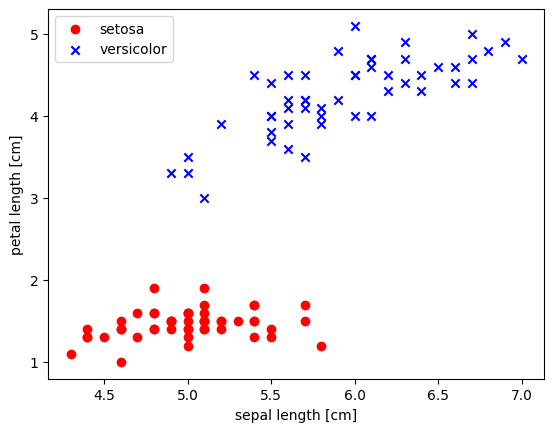

In [ ]:
# setosa와 versicolor를 선택합니다
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# 꽃받침 길이와 꽃잎 길이를 추출합니다
X = df.iloc[0:100, [0, 2]].values

# 산점도를 그립니다, setosa-음성, versicolor-양성
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

In [ ]:
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


### Training the perceptron model

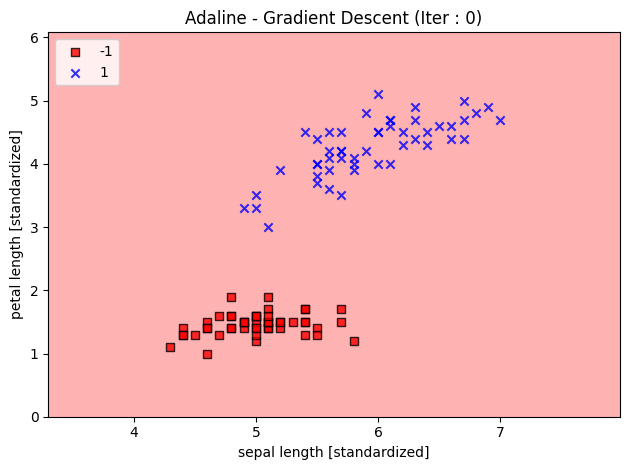

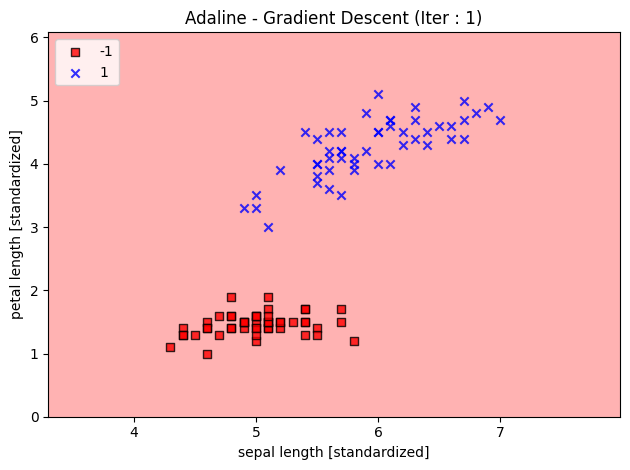

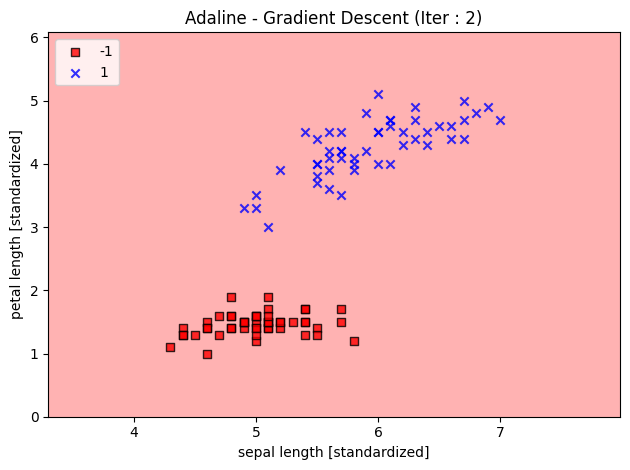

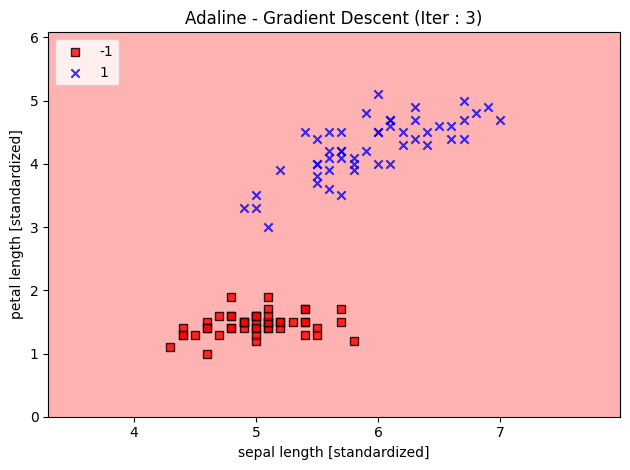

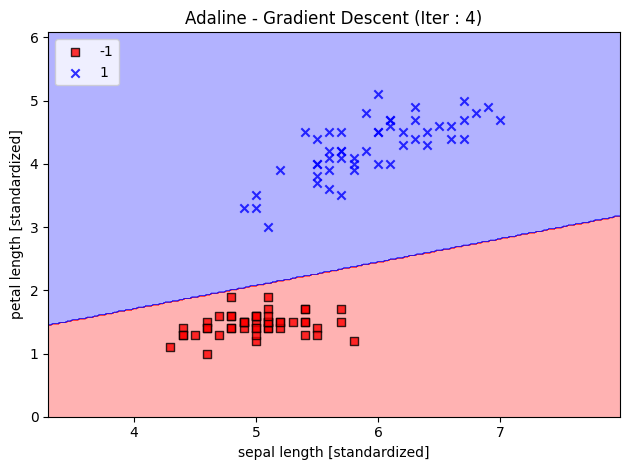

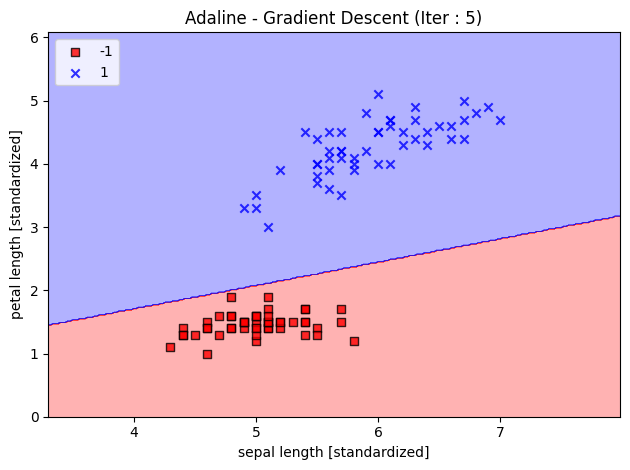

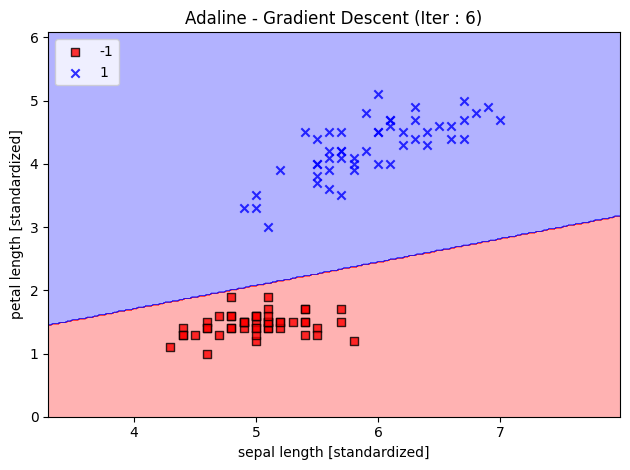

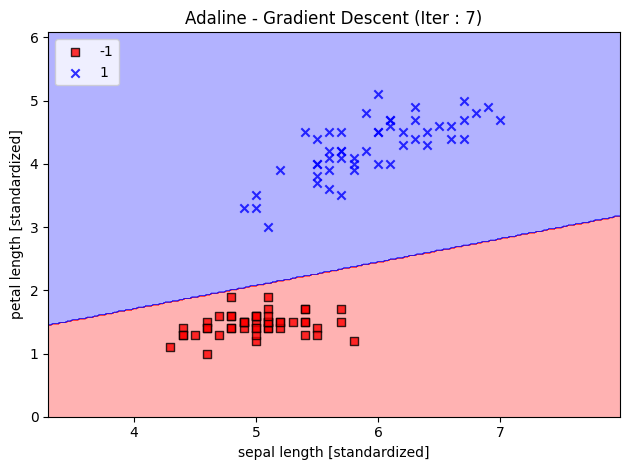

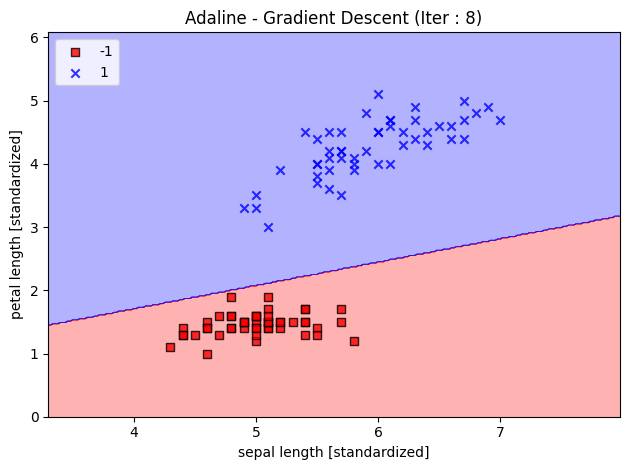

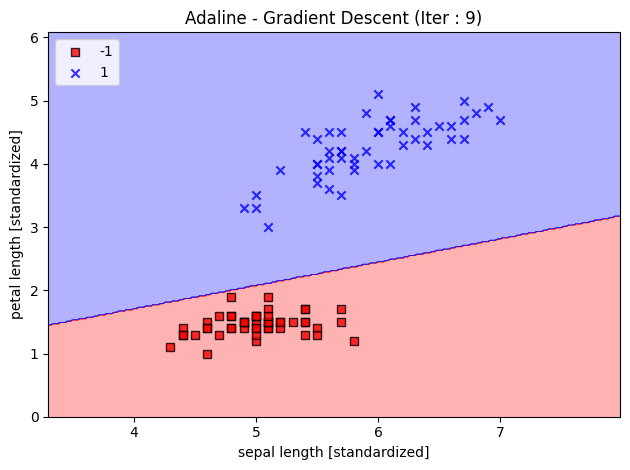

In [ ]:
# 여러가지 eta 값을 이용해 실행 해 보세요.
ppn = Perceptron(eta=0.1, n_iter=10, random_state=100)
# ppn = Perceptron(eta=0.5, n_iter=10, random_state=100)

ppn.fit_with_visualization(X, y)

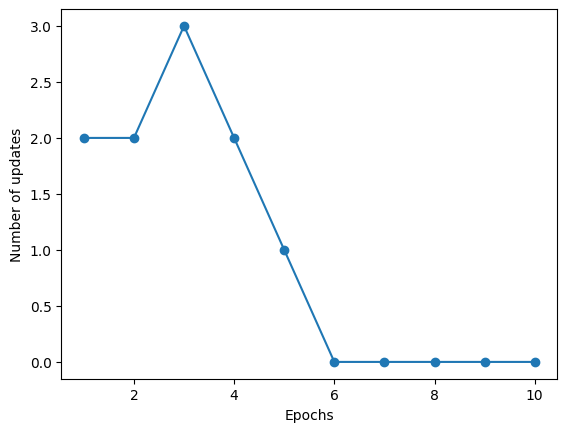

In [ ]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

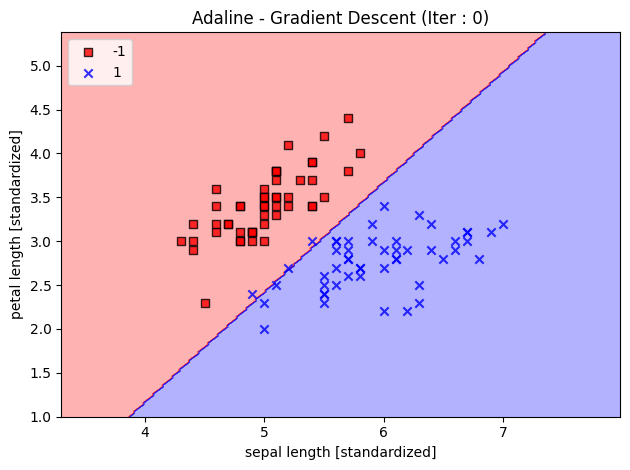

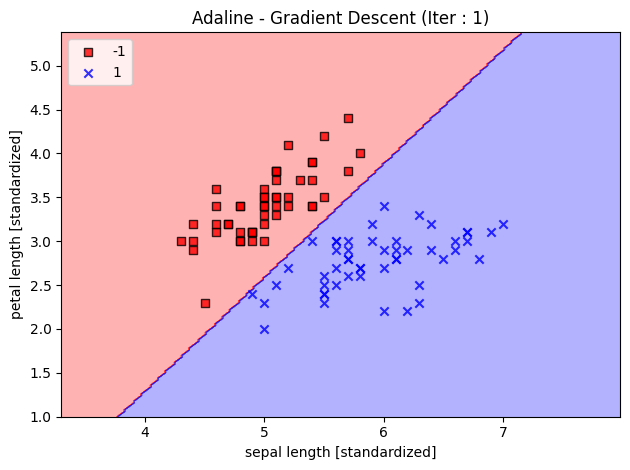

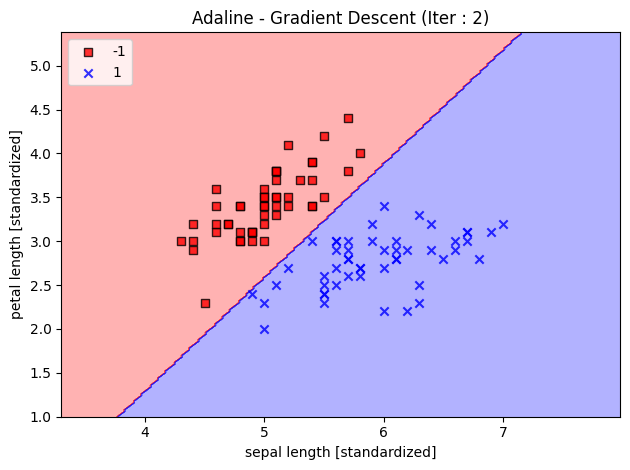

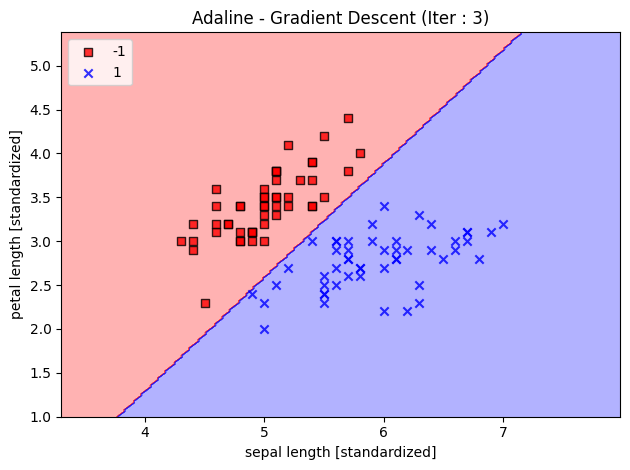

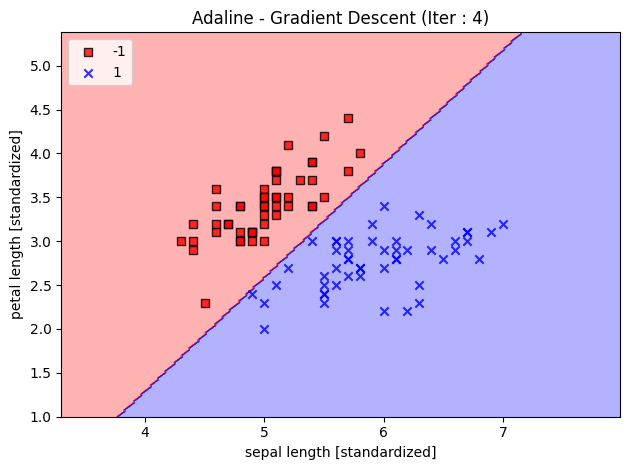

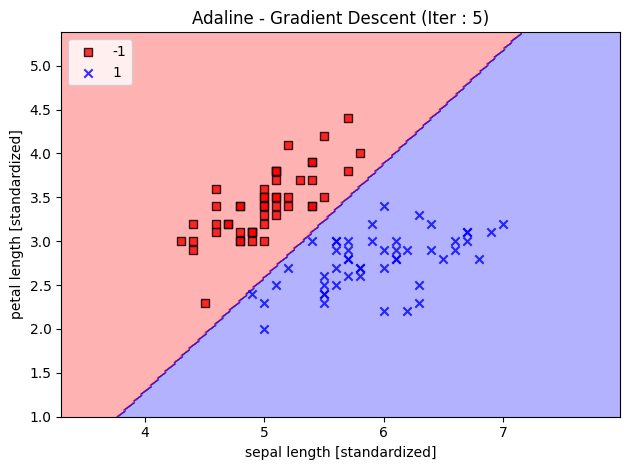

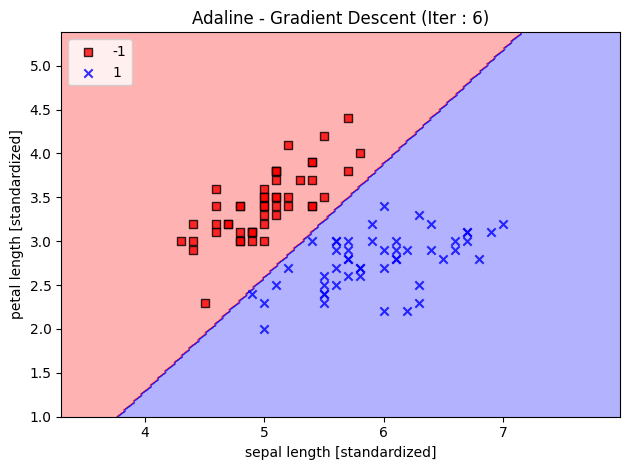

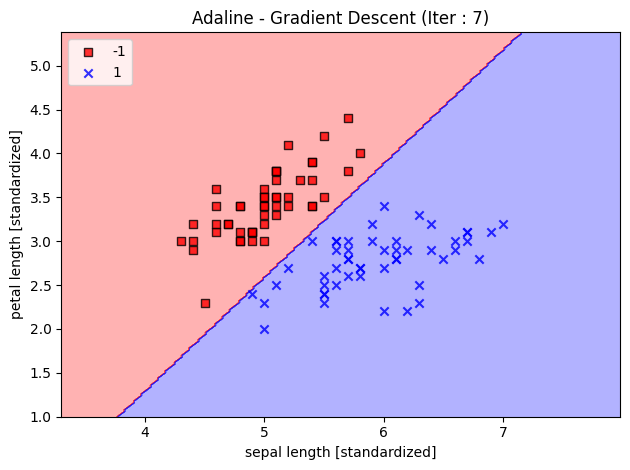

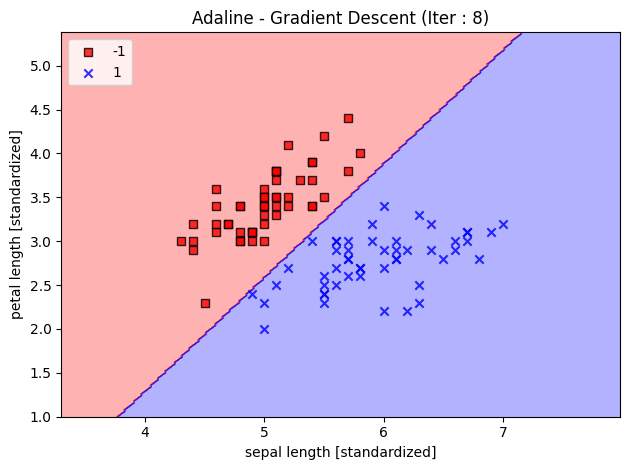

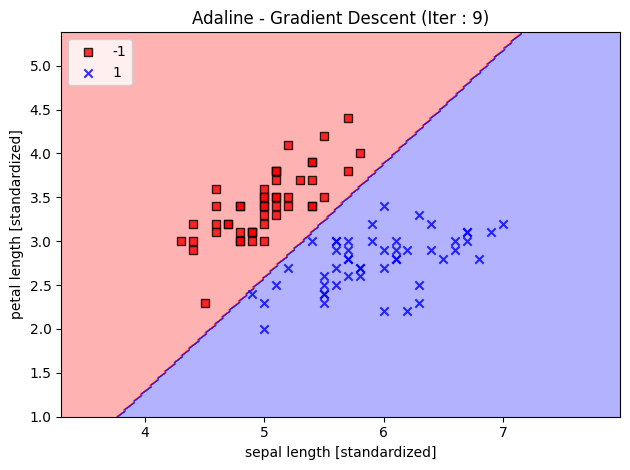

In [ ]:
# 다양한 Attribute를 이용해 훈련 해 보세요.
# 1. sepal length in cm
# 2. sepal width in cm
# 3. petal length in cm
# 4. petal width in cm
# 5. class:
# -- Iris Setosa
# -- Iris Versicolour
# -- Iris Virginica

# X = df.iloc[0:100, [2, 3]].values

##################################################
# Challenge: sepal length와 width를 이용해 분류가 가능한지 판단 해 보세요.

X = df.iloc[0:100,[0, 1]].values

##################################################

ppn = Perceptron(eta=1e-5, n_iter=10, random_state=50)

ppn.fit_with_visualization(X, y)

Challenge: Perceptron의 Output Label Prediction이 아닌 Output Score를 이용해 업데이트 하도록 수정 해 보세요. (Hint: Use net_input function)

In [ ]:
import numpy as np


class Perceptron2(object):
    """퍼셉트론 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    errors_ : list
      에포크마다 누적된 분류 오류

    """
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit_with_visualization(self, X, y, visualize=True):
        """훈련 데이터 학습

        매개변수
        ----------
        X : array-like, shape = [n_samples, n_features]
          n_samples개의 샘플과 n_features개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for iter in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):

                ##################################################
                # Perceptron의 Output Label Prediction이 아닌 Output Score를
                # 이용해 업데이트 하도록 수정 해 보세요.
                # (Hint: Use net_input function)

                update = self.eta * (target - self.net_input(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update

                ##################################################

                errors += int(update != 0.0)
            self.errors_.append(errors)

            if visualize:
                plt.clf()
                plt.cla()
                plot_decision_regions(X, y, classifier=self)
                plt.title('Adaline - Gradient Descent (Iter : {})'.format(iter))
                plt.xlabel('sepal length [standardized]')
                plt.ylabel('petal length [standardized]')
                plt.legend(loc='upper left')
                plt.tight_layout()
                plt.show()

        return self

    def net_input(self, X):
        """입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

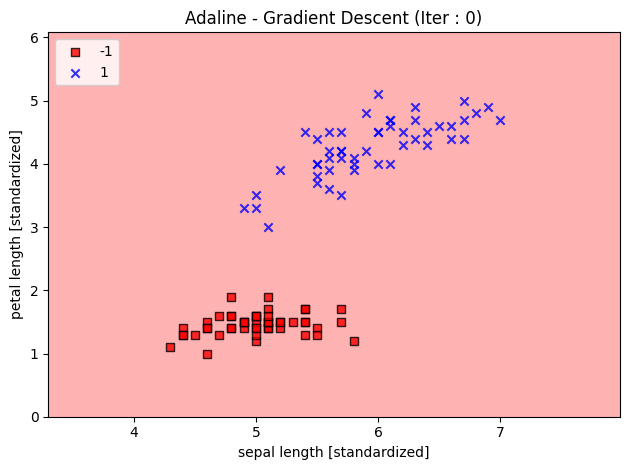

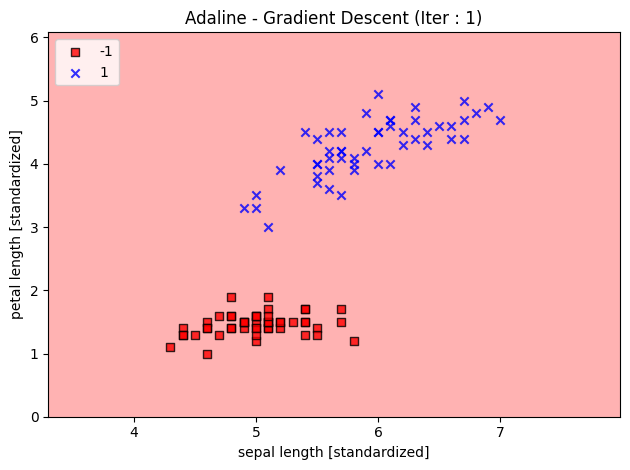

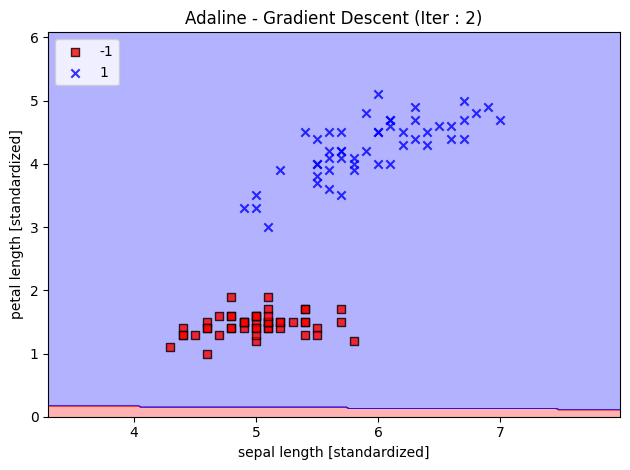

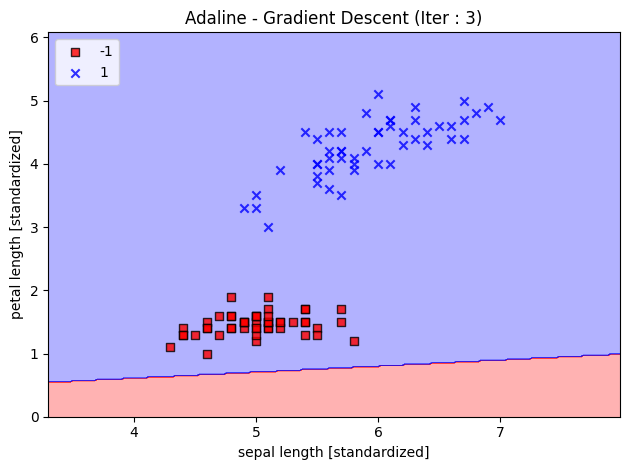

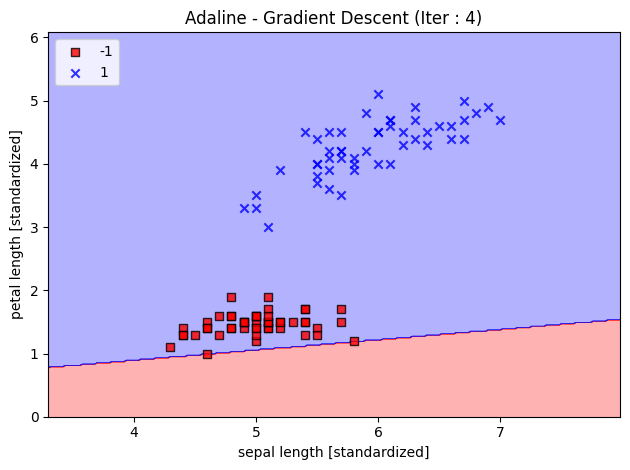

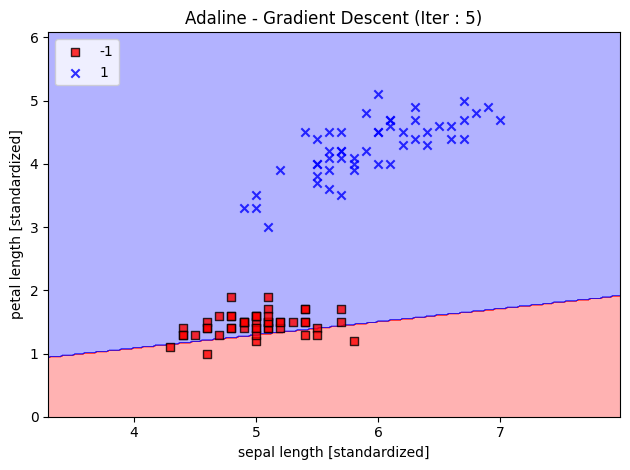

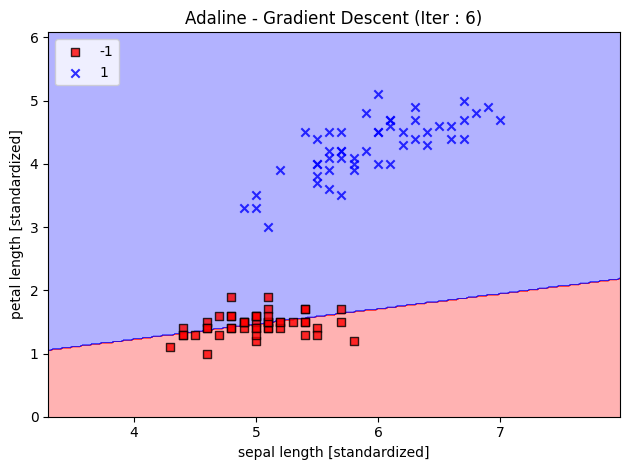

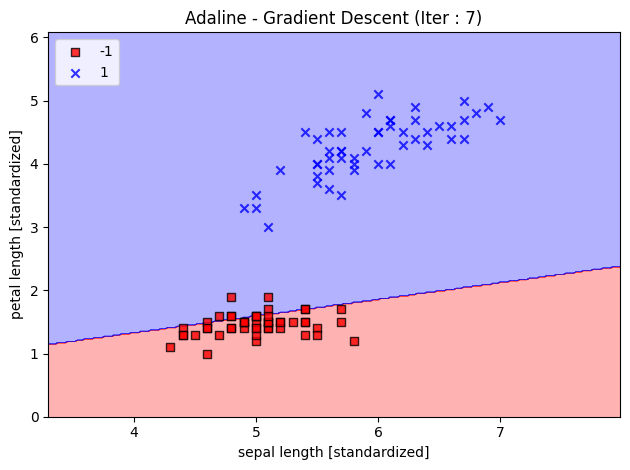

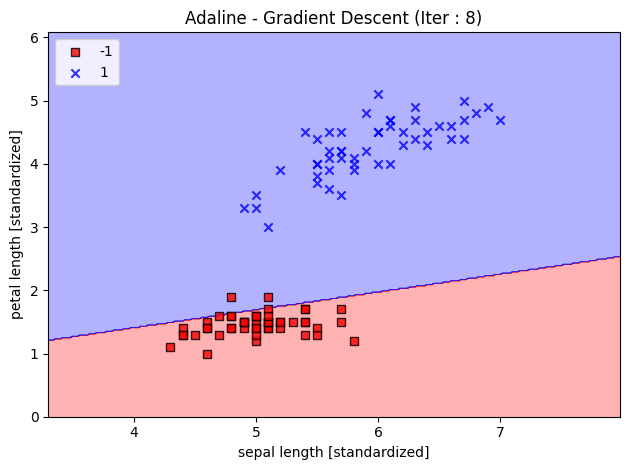

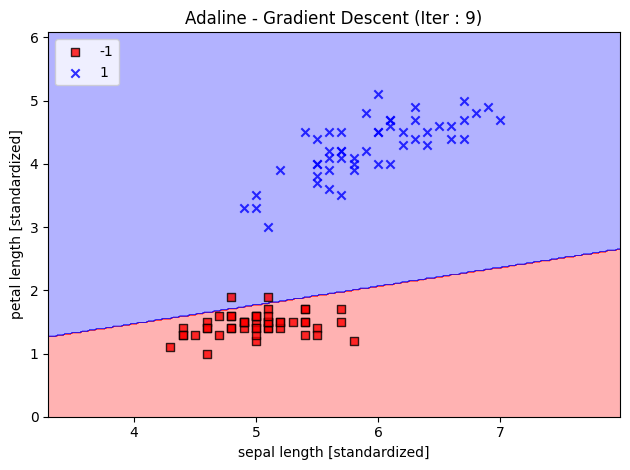

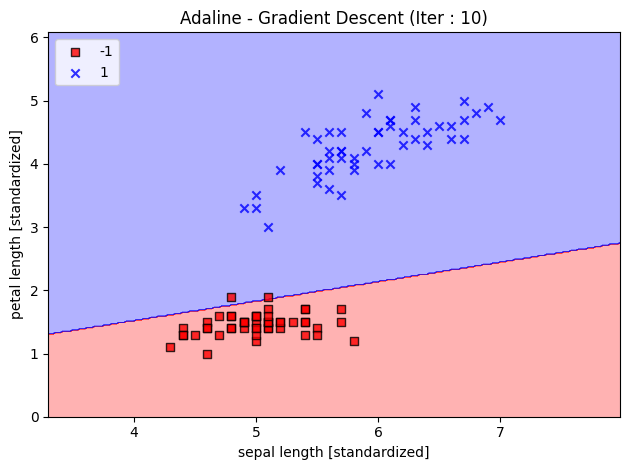

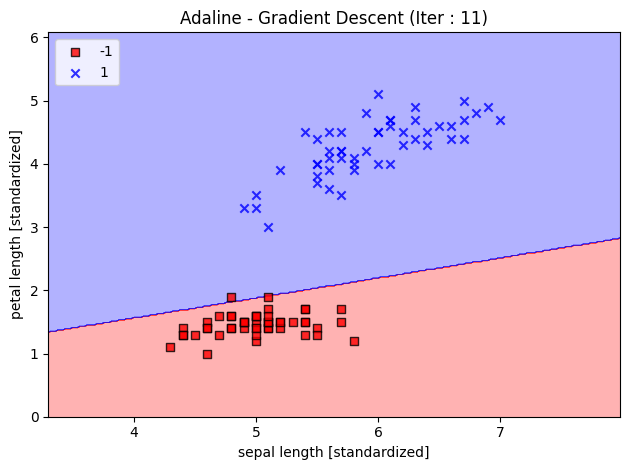

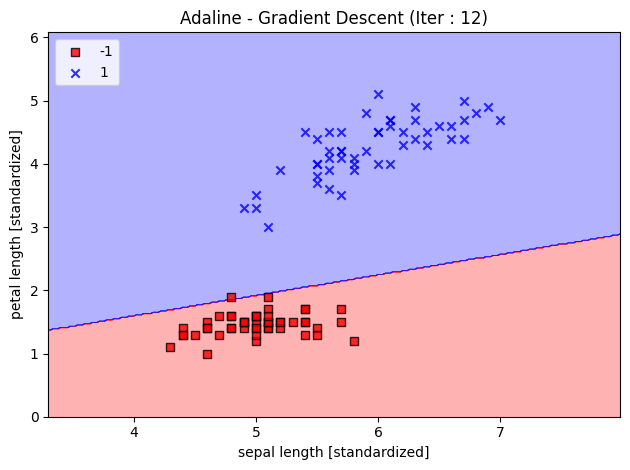

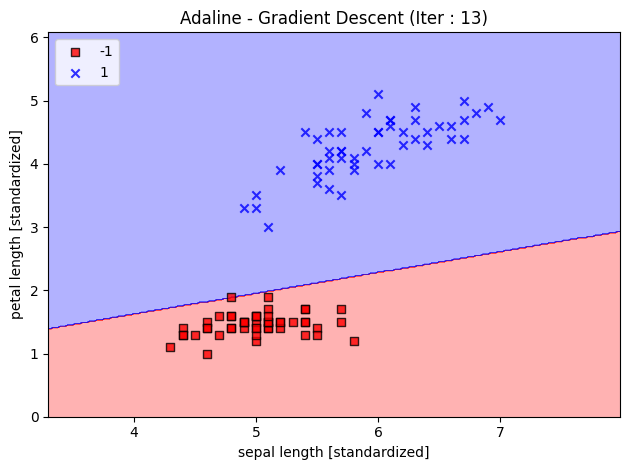

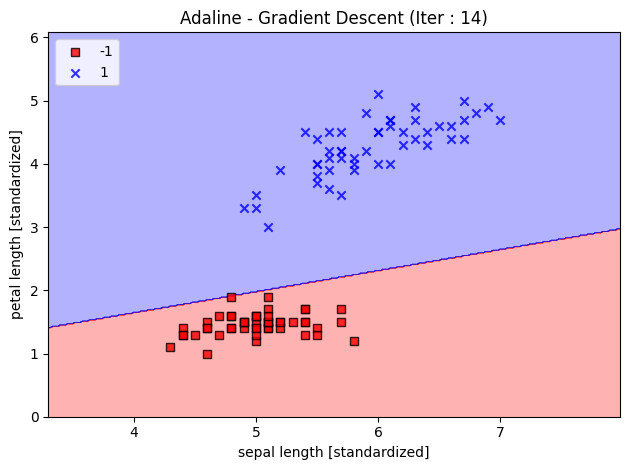

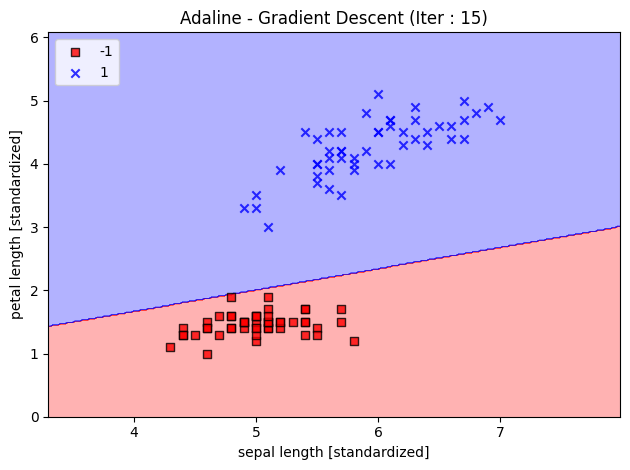

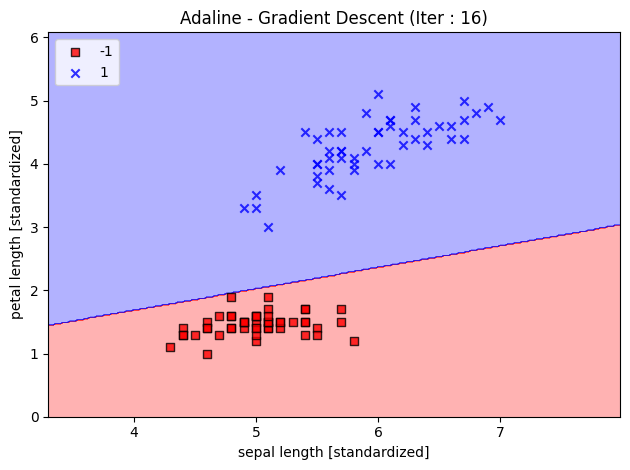

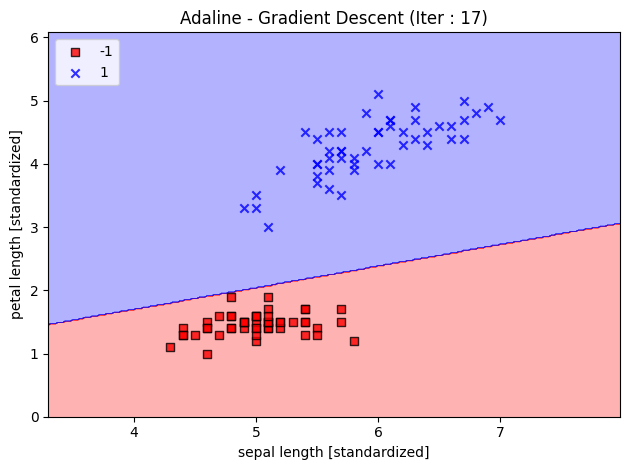

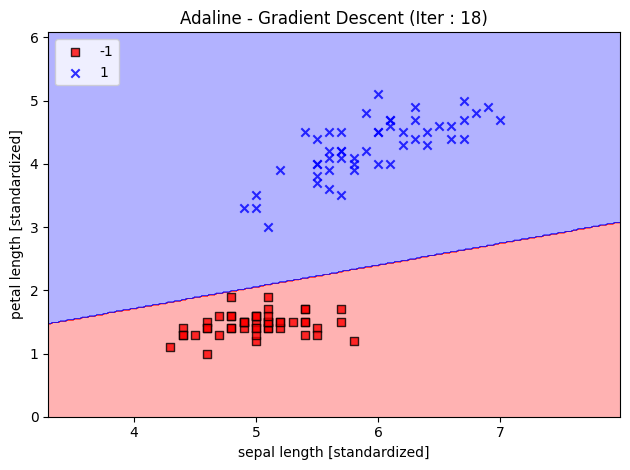

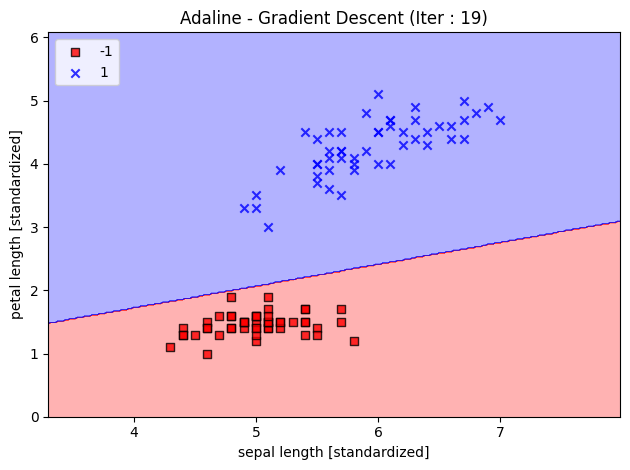

In [ ]:
X = df.iloc[0:100, [0, 2]].values
ppn2 = Perceptron2(eta=0.01, n_iter=20, random_state=100)

ppn2.fit_with_visualization(X, y)